In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
Loan_ID=test_data.Loan_ID

In [4]:
Loan_ID

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [5]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# STATISTICS

In [9]:
train_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [10]:
train_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
train_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

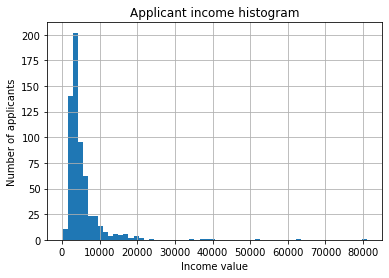

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = train_data['ApplicantIncome']
plt.hist(x, bins=60)
plt.ylabel('Number of applicants')
plt.xlabel('Income value')
plt.title('Applicant income histogram')
plt.grid()
plt.show()

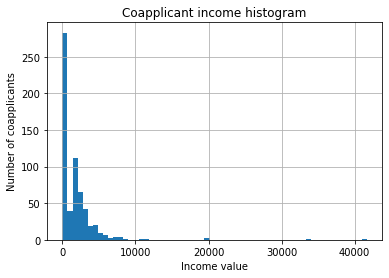

In [17]:
x = train_data['CoapplicantIncome']
plt.hist(x, bins=60)
plt.ylabel('Number of coapplicants')
plt.xlabel('Income value')
plt.title('Coapplicant income histogram')
plt.grid()
plt.show()

C:\Users\bibarys.mussagaliye\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bibarys.mussagaliye\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


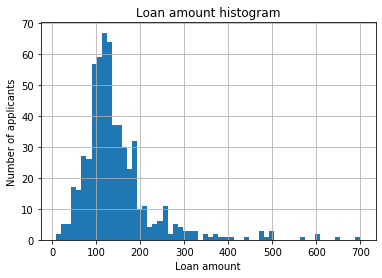

In [18]:
x = train_data['LoanAmount']
plt.hist(x, bins=60)
plt.xlabel('Loan amount')
plt.ylabel('Number of applicants')
plt.title('Loan amount histogram')
plt.grid()
plt.show()

In [19]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<Figure size 1080x1080 with 0 Axes>

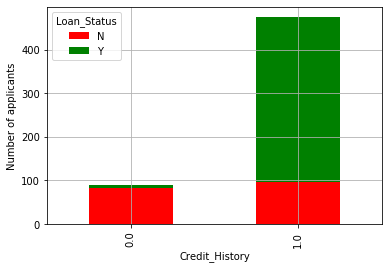

In [20]:
plt.figure(figsize = (15, 15))
dfq = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
dfq.plot(kind = 'bar', stacked = True, color = ['red','green'], grid = False)
#plt.title('Loan status based on credit history bar-chart')
plt.ylabel('Number of applicants')
plt.grid()

# DATA PREPROCESSING

In [21]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Deleting the "+" sign

In [23]:
td=train_data.iloc[:,1:4]
td

,Gender,Married,Dependents
0,Male,No,0
1,Male,Yes,1
2,Male,Yes,0
3,Male,Yes,0
4,Male,No,0
...,...,...,...
609,Female,No,0
610,Male,Yes,3+
611,Male,Yes,1
612,Male,Yes,2


In [24]:
train_data['Dependents'] = train_data['Dependents'].str.replace("+", "")
td=train_data.iloc[:,1:4]
td

,Gender,Married,Dependents
0,Male,No,0
1,Male,Yes,1
2,Male,Yes,0
3,Male,Yes,0
4,Male,No,0
...,...,...,...
609,Female,No,0
610,Male,Yes,3
611,Male,Yes,1
612,Male,Yes,2


In [25]:
test_data['Dependents'] = test_data['Dependents'].str.replace("+", "")
ts=test_data.iloc[:,1:4]
ts

,Gender,Married,Dependents
0,Male,Yes,0
1,Male,Yes,1
2,Male,Yes,2
3,Male,Yes,2
4,Male,No,0
...,...,...,...
362,Male,Yes,3
363,Male,Yes,0
364,Male,No,0
365,Male,Yes,0


# creating combined dataset (train + test)

In [26]:
def combine_data():
    train = train_data.copy() #pd.read_csv(r'C:\Users\bibarys.mussagaliye\Loan-Prediction-Classification\Dataset\train.csv')
    test = test_data.copy() #pd.read_csv(r'C:\Users\bibarys.mussagaliye\Loan-Prediction-Classification\Dataset\test.csv')
    tar = train.Loan_Status
    train.drop('Loan_Status', 1, inplace=True)
    comb = train.append(test)
    comb.reset_index(inplace = True)
    comb.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return comb

In [27]:
comb = combine_data()
comb.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [28]:
comb['Gender'].fillna('Male', inplace=True)

In [29]:
comb['Married'].fillna('Yes', inplace=True)

In [30]:
comb['Self_Employed'].fillna('No', inplace=True)

In [31]:
comb['LoanAmount'].fillna(comb['LoanAmount'].mean(), inplace=True)

In [32]:
comb['Credit_History'].fillna(1, inplace=True)


In [33]:
comb['Dependents'].fillna(str(comb.Dependents.mode()),inplace=True)

In [34]:
comb['Loan_Amount_Term'].fillna(comb.Loan_Amount_Term.mode()[0],inplace=True)

In [35]:
comb['LoanAmount_log'] = np.log(comb['LoanAmount'])

In [36]:
comb['TotalIncome'] = comb['ApplicantIncome'] + comb['CoapplicantIncome']
comb['TotalIncome_log'] = np.log(comb['TotalIncome'])

In [37]:
comb.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

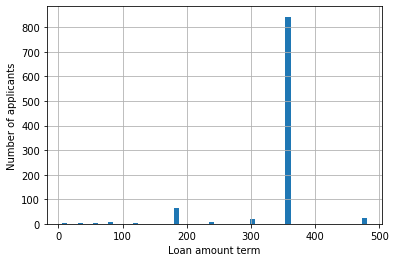

In [38]:
x = comb['Loan_Amount_Term']
plt.hist(x, bins=60)
plt.xlabel('Loan amount term')
plt.ylabel('Number of applicants')
#plt.title('Loan amount term histogram')
plt.grid()
plt.show()

In [39]:
comb['Loan_Amount_Term'] = np.log(comb['Loan_Amount_Term'])

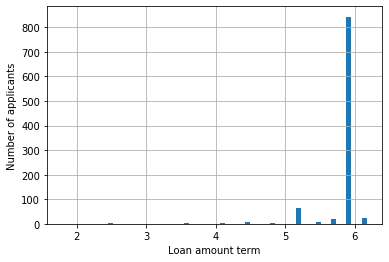

In [40]:
x=comb['Loan_Amount_Term']
plt.hist(x, bins=60)
plt.xlabel('Loan amount term')
plt.ylabel('Number of applicants')
#plt.title('Loan amount term histogram (log)')
plt.grid()
plt.show()

In [41]:
comb.head(7)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,Male,No,0,Graduate,No,5849,0.0,142.51153,5.886104,1.0,Urban,4.959423,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,5.886104,1.0,Rural,4.852030,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,5.886104,1.0,Urban,4.189655,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,5.886104,1.0,Urban,4.787492,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.00000,5.886104,1.0,Urban,4.948760,6000.0,8.699515
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.00000,5.886104,1.0,Urban,5.587249,9613.0,9.170872
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.00000,5.886104,1.0,Urban,4.553877,3849.0,8.255569


# Missing Data is Fixed

In [42]:
comb.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [43]:
comb['Gender'] = comb['Gender'].map({'Male':1,'Female':0})

In [44]:
comb['Married'] = comb['Married'].map({'Yes':1,'No':0})

In [45]:
comb['Singleton'] = comb['Dependents'].map(lambda d: 1 if d=='1' else 0)
comb['Small_Family'] = comb['Dependents'].map(lambda d: 1 if d=='2' else 0)
comb['Large_Family'] = comb['Dependents'].map(lambda d: 1 if d=='3' else 0)
comb.drop(['Dependents'], axis=1, inplace=True)

In [46]:
comb['Education'] = comb['Education'].map({'Graduate':1,'Not Graduate':0})

In [47]:
comb['Self_Employed'] = comb['Self_Employed'].map({'Yes':1,'No':0})

In [48]:
property_dummies = pd.get_dummies(comb['Property_Area'], prefix='Property')
comb = pd.concat([comb, property_dummies], axis=1)
comb.drop('Property_Area', axis=1, inplace=True)

In [49]:
comb.dtypes

Gender                  int64
Married                 int64
Education               int64
Self_Employed           int64
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
LoanAmount_log        float64
TotalIncome           float64
TotalIncome_log       float64
Singleton               int64
Small_Family            int64
Large_Family            int64
Property_Rural          uint8
Property_Semiurban      uint8
Property_Urban          uint8
dtype: object

In [50]:
comb.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,5849,0.0,142.51153,5.886104,1.0,4.959423,5849.0,8.674026,0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.00000,5.886104,1.0,4.852030,6091.0,8.714568,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.00000,5.886104,1.0,4.189655,3000.0,8.006368,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.00000,5.886104,1.0,4.787492,4941.0,8.505323,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.00000,5.886104,1.0,4.948760,6000.0,8.699515,0,0,0,0,0,1


In [51]:
comb.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
Singleton             0
Small_Family          0
Large_Family          0
Property_Rural        0
Property_Semiurban    0
Property_Urban        0
dtype: int64

In [52]:
targets = train_data['Loan_Status'].map({'Y':1,'N':0})
train_final = comb.head(614)
test_final = comb.iloc[614:]

In [53]:
comb.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,5849,0.0,142.51153,5.886104,1.0,4.959423,5849.0,8.674026,0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.00000,5.886104,1.0,4.852030,6091.0,8.714568,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.00000,5.886104,1.0,4.189655,3000.0,8.006368,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.00000,5.886104,1.0,4.787492,4941.0,8.505323,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.00000,5.886104,1.0,4.948760,6000.0,8.699515,0,0,0,0,0,1


In [54]:
train_final.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,5849,0.0,142.51153,5.886104,1.0,4.959423,5849.0,8.674026,0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.00000,5.886104,1.0,4.852030,6091.0,8.714568,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.00000,5.886104,1.0,4.189655,3000.0,8.006368,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.00000,5.886104,1.0,4.787492,4941.0,8.505323,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.00000,5.886104,1.0,4.948760,6000.0,8.699515,0,0,0,0,0,1


In [55]:
test_final.head(20)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban
614,1,1,1,0,5720,0.0,110.0,5.886104,1.0,4.700480,5720.0,8.651724,0,0,0,0,0,1
615,1,1,1,0,3076,1500.0,126.0,5.886104,1.0,4.836282,4576.0,8.428581,1,0,0,0,0,1
616,1,1,1,0,5000,1800.0,208.0,5.886104,1.0,5.337538,6800.0,8.824678,0,1,0,0,0,1
617,1,1,1,0,2340,2546.0,100.0,5.886104,1.0,4.605170,4886.0,8.494129,0,1,0,0,0,1
618,1,0,0,0,3276,0.0,78.0,5.886104,1.0,4.356709,3276.0,8.094378,0,0,0,0,0,1
619,1,1,0,1,2165,3422.0,152.0,5.886104,1.0,5.023881,5587.0,8.628198,0,0,0,0,0,1
620,0,0,0,0,2226,0.0,59.0,5.886104,1.0,4.077537,2226.0,7.707962,1,0,0,0,1,0
621,1,1,0,0,3881,0.0,147.0,5.886104,0.0,4.990433,3881.0,8.263848,0,1,0,1,0,0
622,1,1,1,0,13633,0.0,280.0,5.480639,1.0,5.634790,13633.0,9.520249,0,1,0,0,0,1
623,1,0,0,0,2400,2400.0,123.0,5.886104,1.0,4.812184,4800.0,8.476371,0,0,0,0,1,0


In [56]:
targets.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# CLASSIFIERS DECLARATIONS AND SIMULATIONS

# Logistic regression

# Full feature set

In [57]:
X_train, X_val, y_train, y_val = train_test_split(train_final, targets, test_size = 0.20, random_state = 0)

In [58]:
#feature scaling
st_sc = StandardScaler()
X_train = st_sc.fit_transform(X_train)
X_val = st_sc.transform(X_val)

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

Accuracy
83.73983739837398 %


Cross-Validation
80.44761904761906 %


Score on overfitting
80.65173116089613 %


<Figure size 1152x576 with 0 Axes>

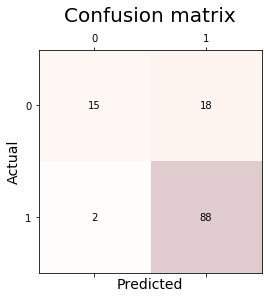

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
y_pred = logreg.predict(X_val)

print("Classification Report")
print(classification_report(y_val, y_pred))
print("Accuracy")
print(accuracy_score(y_val, y_pred)*100, '%')
print('\n')
print("Cross-Validation")
print(cross_val_score(estimator = logreg, X = X_train, y = y_train, cv = 10).mean()*100, '%')
print('\n')
print("Score on overfitting")
print(logreg.score(X_train, y_train)*100, '%')

#second_stack_probs = second_stack.predict_proba(first_stack.transform(X_test))
conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
  for j in range(2):
    plt.text(x=j, y=i, s=conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [61]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt

rf_probs = logreg.predict_proba(X_val)[:, 1]
roc_value = roc_auc_score(y_val, rf_probs)

print('AUC: %f' % roc_value)

AUC: 0.821886


In [62]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC Curve (area = %0.3f)' % roc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()

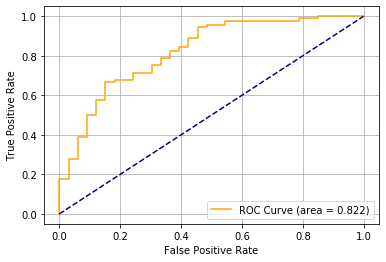

In [63]:
fpr, tpr, thresholds = roc_curve(y_val, rf_probs)
plot_roc_curve(fpr, tpr)

# Feature selection set

In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
logreg_FS = LogisticRegression(solver='lbfgs')
sfs_FS = sfs(logreg_FS, k_features=5, forward=True, floating=False, verbose=2, scoring='accuracy', cv=10, n_jobs=-1)
sfs_FS = sfs_FS.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.3s finished

[2019-11-29 07:51:21] Features: 1/5 -- score: 0.8043928571428574[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  17 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.3s finished

[2019-11-29 07:51:23] Features: 2/5 -- score: 0.8064761904761906[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2019-11-29 07:51:23

In [65]:
feat_cols_1 = list(sfs_FS.k_feature_idx_)
print(feat_cols_1)
list(train_final.columns.values)

[0, 2, 5, 8, 16]


['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'LoanAmount_log',
 'TotalIncome',
 'TotalIncome_log',
 'Singleton',
 'Small_Family',
 'Large_Family',
 'Property_Rural',
 'Property_Semiurban',
 'Property_Urban']

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

Accuracy
83.73983739837398 %


Cross-Validation
80.8517006802721 %


Score on overfitting
80.85539714867616 %


<Figure size 1152x576 with 0 Axes>

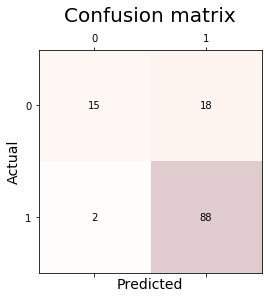

In [66]:
logreg_FS = LogisticRegression(solver='lbfgs')
logreg_FS.fit(X_train[:, feat_cols_1], y_train)
y_pred = logreg_FS.predict(X_val[:, feat_cols_1])

print("Classification Report")
print(classification_report(y_val, y_pred))

print("Accuracy")
print(accuracy_score(y_val, y_pred)*100, '%')
print('\n')

print("Cross-Validation")
print(cross_val_score(estimator = logreg_FS, X = X_train[:, feat_cols_1], y = y_train, cv = 10).mean()*100, '%')
print('\n')

print("Score on overfitting")
y_pred = logreg_FS.predict(X_train[:, feat_cols_1])
print(accuracy_score(y_train, y_pred)*100, '%')
y_pred = logreg_FS.predict(X_val[:, feat_cols_1])

conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
  for j in range(2):
    plt.text(x=j, y=i, s=conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [67]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt

rf_probs = logreg_FS.predict_proba(X_val[:, feat_cols_1])[:, 1]
roc_value = roc_auc_score(y_val, rf_probs)

print('AUC: %f' % roc_value)

AUC: 0.768855


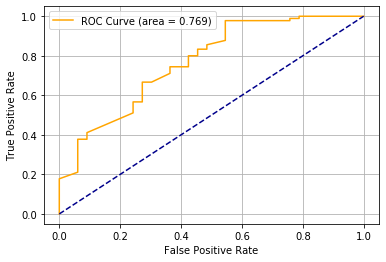

In [68]:
fpr, tpr, thresholds = roc_curve(y_val, rf_probs)
plot_roc_curve(fpr, tpr)

# Random forest classifier

# Full feature set

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123

Accuracy
82.11382113821138 %


Cross-Validation
80.4391156462585 %


Score on overfitting
82.68839103869654 %


<Figure size 1152x576 with 0 Axes>

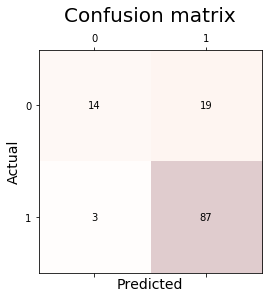

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rfr.predict(X_val)

print("Classification Report")
print(classification_report(y_val, y_pred))
print("Accuracy")
print(accuracy_score(y_val, y_pred)*100, '%')
print('\n')
print("Cross-Validation")
print(cross_val_score(estimator = rfr, X = X_train, y = y_train, cv = 10).mean()*100, '%')
print('\n')
print("Score on overfitting")
print(rfr.score(X_train, y_train)*100, '%')

conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
  for j in range(2):
    plt.text(x=j, y=i, s=conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [71]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt

rf_probs = rfr.predict_proba(X_val)[:, 1]
roc_value = roc_auc_score(y_val, rf_probs)

print('AUC: %f' % roc_value)

AUC: 0.787879


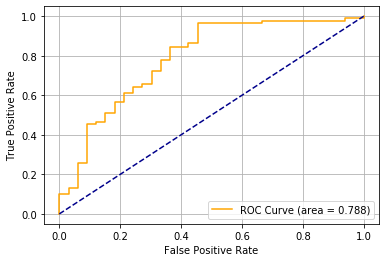

In [72]:
fpr, tpr, thresholds = roc_curve(y_val, rf_probs)
plot_roc_curve(fpr, tpr)

# above for checking the overfitting (not overfitting since not 100%) 

# Feature selection set

In [73]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
rfr_FS = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0, n_jobs=-1)
sfs_FS = sfs(rfr_FS, k_features=5, forward=True, floating=False, verbose=2, scoring='accuracy', cv=10, n_jobs=-1)
sfs_FS = sfs_FS.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.6s finished

[2019-11-29 07:51:30] Features: 1/5 -- score: 0.8043928571428574[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  17 | elapsed:    2.5s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.6s finished

[2019-11-29 07:51:33] Features: 2/5 -- score: 0.8084744897959183[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  16 | elapsed:    2.4s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    2.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    2.6s finished

[2019-11-29 07:51:35

In [74]:
feat_cols_2 = list(sfs_FS.k_feature_idx_)
print(feat_cols_2)
list(train_final.columns.values)

[3, 7, 8, 15, 16]


['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'LoanAmount_log',
 'TotalIncome',
 'TotalIncome_log',
 'Singleton',
 'Small_Family',
 'Large_Family',
 'Property_Rural',
 'Property_Semiurban',
 'Property_Urban']

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123

Accuracy
82.11382113821138 %


Cross-Validation
80.64336734693877 %


Score on overfitting
81.4663951120163 %


<Figure size 1152x576 with 0 Axes>

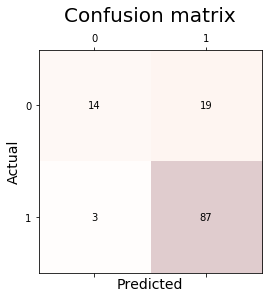

In [75]:
rfr_FS = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0, n_jobs=-1)
rfr_FS.fit(X_train[:, feat_cols_2], y_train)
y_pred = rfr_FS.predict(X_val[:, feat_cols_2])

print("Classification Report")
print(classification_report(y_val, y_pred))
print("Accuracy")
print(accuracy_score(y_val, y_pred)*100, '%')
print('\n')
print("Cross-Validation")
print(cross_val_score(estimator = rfr_FS, X = X_train[:, feat_cols_2], y = y_train, cv = 10).mean()*100, '%')
print('\n')
print("Score on overfitting")
y_pred = rfr_FS.predict(X_train[:, feat_cols_2])
print(accuracy_score(y_train, y_pred)*100, '%')

y_pred = rfr_FS.predict(X_val[:, feat_cols_2])

conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
  for j in range(2):
    plt.text(x=j, y=i, s=conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [76]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt

rf_probs = rfr_FS.predict_proba(X_val[:, feat_cols_2])[:, 1]
roc_value = roc_auc_score(y_val, rf_probs)

print('AUC: %f' % roc_value)

AUC: 0.742761


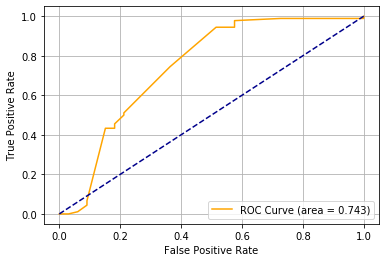

In [77]:
fpr, tpr, thresholds = roc_curve(y_val, rf_probs)
plot_roc_curve(fpr, tpr)

# Gradient boosting classifier XGBoost

# Full feature set

In [78]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [79]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = XGBClassifier(n_estimators=20, learning_rate=learning_rate, max_features=0.1, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.811
Accuracy score (validation): 0.821
Learning rate:  0.075
Accuracy score (training): 0.807
Accuracy score (validation): 0.829
Learning rate:  0.1
Accuracy score (training): 0.807
Accuracy score (validation): 0.829
Learning rate:  0.25
Accuracy score (training): 0.819
Accuracy score (validation): 0.821
Learning rate:  0.5
Accuracy score (training): 0.841
Accuracy score (validation): 0.837
Learning rate:  0.75
Accuracy score (training): 0.859
Accuracy score (validation): 0.805
Learning rate:  1
Accuracy score (training): 0.872
Accuracy score (validation): 0.821


Classification Report
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        33
           1       0.85      0.91      0.88        90

    accuracy                           0.82       123
   macro avg       0.78      0.74      0.76       123
weighted avg       0.81      0.82      0.82       123

Accuracy
82.11382113821138 %


Cross-Validation
77.38180272108843 %


Score on overfitting
87.16904276985743 %


<Figure size 1152x576 with 0 Axes>

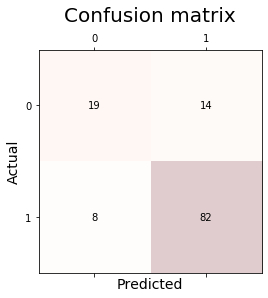

In [80]:
gb_clf2 = XGBClassifier(n_estimators=20, learning_rate=1, max_features=0.1, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_val)

print("Classification Report")
print(classification_report(y_val, y_pred))

print("Accuracy")
print(accuracy_score(y_val, y_pred)*100, '%')
print('\n')

print("Cross-Validation")
print(cross_val_score(estimator = gb_clf, X = X_train, y = y_train, cv = 10).mean()*100, '%')
print('\n')

print("Score on overfitting")
y_pred = gb_clf.predict(X_train)
print(accuracy_score(y_train, y_pred)*100, '%')

y_pred = gb_clf2.predict(X_val)
conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
  for j in range(2):
    plt.text(x=j, y=i, s=conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [81]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt

rf_probs = gb_clf2.predict_proba(X_val)[:, 1]
roc_value = roc_auc_score(y_val, rf_probs)

print('AUC: %f' % roc_value)

AUC: 0.776431


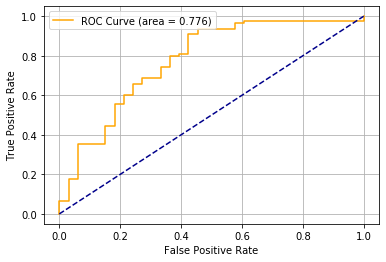

In [82]:
fpr, tpr, thresholds = roc_curve(y_val, rf_probs)
plot_roc_curve(fpr, tpr)

# Feature selection set

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
xgb_FS = XGBClassifier(n_estimators=20, learning_rate=1, max_features=0.1, max_depth=8, random_state=0, n_jobs=-1)
sfs_FS = sfs(xgb_FS, k_features=5, forward=True, floating=False, verbose=2, scoring='accuracy', cv=10)
sfs_FS = sfs_FS.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.3s finished

[2019-11-29 07:51:48] Features: 1/5 -- score: 0.8043928571428574[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.4s finished

[2019-11-29 07:51:50] Features: 2/5 -- score: 0.8043928571428574[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.4s finished

[2019-11-29 07:51:51] Features: 3/5 -- score: 0.8043928571428574[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [85]:
feat_cols_3 = list(sfs_FS.k_feature_idx_)
print(feat_cols_3)
list(train_final.columns.values)

[0, 1, 2, 8, 16]


['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'LoanAmount_log',
 'TotalIncome',
 'TotalIncome_log',
 'Singleton',
 'Small_Family',
 'Large_Family',
 'Property_Rural',
 'Property_Semiurban',
 'Property_Urban']

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

Accuracy
82.92682926829268 %


Cross-Validation
80.84744897959183 %


Score on overfitting
80.85539714867616 %


<Figure size 1152x576 with 0 Axes>

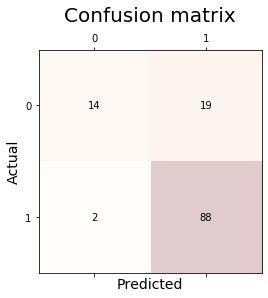

In [86]:
xgb_FS = XGBClassifier(n_estimators=20, learning_rate=1, max_features=0.1, max_depth=8, random_state=0)
xgb_FS.fit(X_train[:, feat_cols_3], y_train)
y_pred = xgb_FS.predict(X_val[:, feat_cols_3])

print("Classification Report")
print(classification_report(y_val, y_pred))
print("Accuracy")
print(accuracy_score(y_val, y_pred)*100, '%')
print('\n')
print("Cross-Validation")
print(cross_val_score(estimator = xgb_FS, X = X_train[:, feat_cols_3], y = y_train, cv = 10).mean()*100, '%')
print('\n')
print("Score on overfitting")
y_pred = xgb_FS.predict(X_train[:, feat_cols_3])
print(accuracy_score(y_train, y_pred)*100, '%')

y_pred = xgb_FS.predict(X_val[:, feat_cols_3])
conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
  for j in range(2):
    plt.text(x=j, y=i, s=conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [87]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt

rf_probs = xgb_FS.predict_proba(X_val[:, feat_cols_3])[:, 1]
roc_value = roc_auc_score(y_val, rf_probs)

print('AUC: %f' % roc_value)

AUC: 0.782660


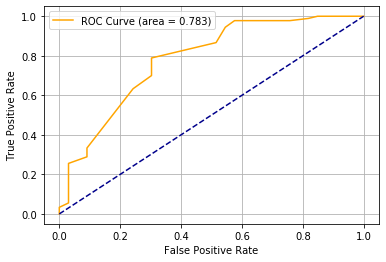

In [88]:
fpr, tpr, thresholds = roc_curve(y_val, rf_probs)
plot_roc_curve(fpr, tpr)

In [89]:
predictor_var = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome', 'TotalIncome_log', 'Singleton', 'Small_Family', 'Large_Family', 'Property_Rural', 'Property_Semiurban', 'Property_Urban']
featimp = pd.Series(rfr.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)


Credit_History        0.443567
TotalIncome           0.100334
TotalIncome_log       0.081893
ApplicantIncome       0.074278
LoanAmount_log        0.066737
LoanAmount            0.064869
CoapplicantIncome     0.039166
Property_Rural        0.023717
Loan_Amount_Term      0.021562
Property_Semiurban    0.018388
Education             0.015515
Large_Family          0.011198
Married               0.008586
Singleton             0.008533
Property_Urban        0.006833
Gender                0.006407
Self_Employed         0.004919
Small_Family          0.003497
dtype: float64


# KNN

# Full feature set

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.45      0.58        33
           1       0.83      0.96      0.89        90

    accuracy                           0.82       123
   macro avg       0.81      0.71      0.73       123
weighted avg       0.82      0.82      0.80       123

Accuracy
82.11382113821138 %


Cross-Validation
76.37380952380953 %


Score on overfitting
82.28105906313645 %


<Figure size 1152x576 with 0 Axes>

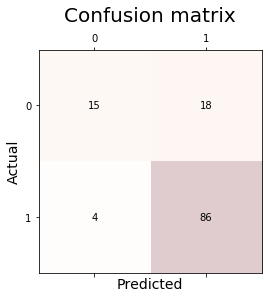

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_val)

print("Classification Report")
print(classification_report(y_val, y_pred))

print("Accuracy")
print(accuracy_score(y_val, y_pred)*100, '%')
print('\n')

print("Cross-Validation")
print(cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10).mean()*100, '%')
print('\n')

print("Score on overfitting")
y_pred = knn.predict(X_train)
print(accuracy_score(y_train, y_pred)*100, '%')

y_pred = knn.predict(X_val)
conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
  for j in range(2):
    plt.text(x=j, y=i, s=conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [92]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt

rf_probs = knn.predict_proba(X_val)[:, 1]
roc_value = roc_auc_score(y_val, rf_probs)

print('AUC: %f' % roc_value)

AUC: 0.744949


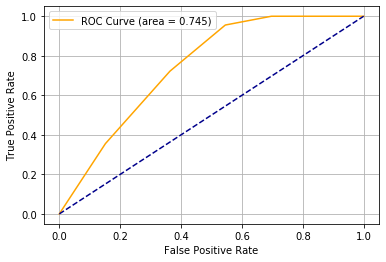

In [93]:
fpr, tpr, thresholds = roc_curve(y_val, rf_probs)
plot_roc_curve(fpr, tpr)

In [94]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
knn_FS = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
sfs_FS = sfs(knn_FS, k_features=5, forward=True, floating=False, verbose=2, scoring='accuracy', cv=10, n_jobs=-1)
sfs_FS = sfs_FS.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2019-11-29 07:51:55] Features: 1/5 -- score: 0.8043928571428574[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2019-11-29 07:51:55] Features: 2/5 -- score: 0.8043928571428574[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2019-11-29 07:51:55

In [95]:
feat_cols_4 = list(sfs_FS.k_feature_idx_)
print(feat_cols_4)
list(train_final.columns.values)

[0, 2, 8, 13, 16]


['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'LoanAmount_log',
 'TotalIncome',
 'TotalIncome_log',
 'Singleton',
 'Small_Family',
 'Large_Family',
 'Property_Rural',
 'Property_Semiurban',
 'Property_Urban']

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

Accuracy
82.92682926829268 %


Cross-Validation
80.43928571428573 %


Score on overfitting
80.44806517311609 %


<Figure size 1152x576 with 0 Axes>

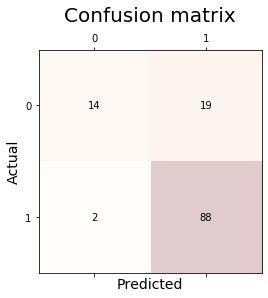

In [96]:
knn_FS = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_FS.fit(X_train[:, feat_cols_4], y_train)
y_pred = knn_FS.predict(X_val[:, feat_cols_4])

print("Classification Report")
print(classification_report(y_val, y_pred))
print("Accuracy")
print(accuracy_score(y_val, y_pred)*100, '%')
print('\n')
print("Cross-Validation")
print(cross_val_score(estimator = knn_FS, X = X_train[:, feat_cols_4], y = y_train, cv = 10).mean()*100, '%')
print('\n')
print("Score on overfitting")
y_pred = knn_FS.predict(X_train[:, feat_cols_4])
print(accuracy_score(y_train, y_pred)*100, '%')

y_pred = knn_FS.predict(X_val[:, feat_cols_4])
conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.2)
for i in range(2):
  for j in range(2):
    plt.text(x=j, y=i, s=conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [97]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt

rf_probs = knn_FS.predict_proba(X_val[:, feat_cols_4])[:, 1]
roc_value = roc_auc_score(y_val, rf_probs)

print('AUC: %f' % roc_value)

AUC: 0.796128


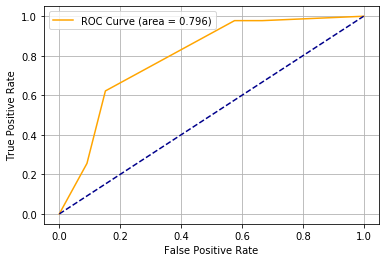

In [98]:
fpr, tpr, thresholds = roc_curve(y_val, rf_probs)
plot_roc_curve(fpr, tpr)

In [99]:
targets

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [100]:
rfr_FS = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0, n_jobs=-1)
rfr_FS.fit(X_train[:, feat_cols_2], y_train)
#y_pred = rfr_FS.predict(X_val[:, feat_cols_2])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [101]:
output_file=pd.DataFrame()
feat_cols_2

[3, 7, 8, 15, 16]

In [102]:
output=rfr_FS.predict(test_final.iloc[:, feat_cols_2]).astype(int)

In [103]:
output

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [104]:
output_file['Loan_Status'] = output
output_file['Loan_ID'] = Loan_ID

In [105]:
output_file.head(10)

,Loan_Status,Loan_ID
0,1,LP001015
1,1,LP001022
2,1,LP001031
3,1,LP001035
4,1,LP001051
5,1,LP001054
6,1,LP001055
7,0,LP001056
8,1,LP001059
9,1,LP001067


In [106]:
output_file[['Loan_ID', 'Loan_Status']].to_csv('output.csv', index=False)